In [23]:
import random
import torch

n = random.randint(2, 6)
iC = random.randint(2, 6)
oC = random.randint(2, 6)
H = random.randint(10, 20)
W = random.randint(10, 20)
kH = random.randint(2, 6)
kW = random.randint(2, 6)

input = torch.rand(n, iC, H, W, dtype=torch.float32)
kernel = torch.rand(oC, iC, kH, kW, dtype=torch.float32)

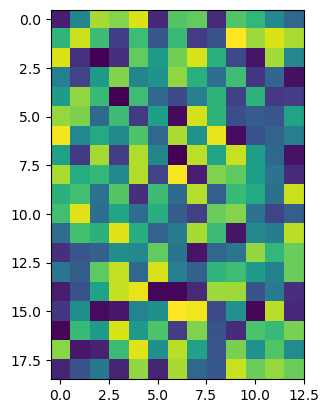

In [32]:
import matplotlib.pyplot as plt
plt.imshow(input[0, 0, :, :])
plt.show()

In [35]:
import torch

n, _, H, W = input.shape
oC, _, kH, kW = kernel.shape

oH, oW = H-(kH-1), W-(kW-1)

out = torch.zeros((n, oC, oH, oW), dtype=torch.float32)

for i in range(oH):
    for j in range(oW):
        inp = input.unsqueeze(1)[:,:,:,i:i+kH,j:j+kW]
        ker = kernel.unsqueeze(0)
        out[:,:,i,j]=(inp*ker).sum((-1,-2,-3))

In [37]:
out.shape

torch.Size([2, 6, 18, 10])